**Name: Ashutosh Pawar**

**PRN: 20070243019**

**Subject: Deep Learning**

**Task: To build a CNN Model which will classify the flowers as Dandelion or Tulip.**

**1. Importing neccessary libraries**

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator manipulates the image by augmenting it through a preprocessing stage

**2. Pre-Processing the train data**

Here. we are using the **ImageDataGenerator** which lets us augment our images in real-time while our model is still training! 

It can also be applied to any random transformations on each training image as it is passed to the model. This specifically will not only make our model robust but will also save up on the overhead memory.

In [6]:
 # Preprocessing the train data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Reading train_datagen
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL/Assign3/FlowerData/train_set',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary') 

Found 2046 images belonging to 2 classes.


**3. Pre-Processing the test data**

In [8]:
 # Preprocessing the test data
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Reading test_datagen
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DL/Assign3/FlowerData/test_set',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary') 

Found 1000 images belonging to 2 classes.


# Building the CNN Model

**1. Here the CNN Model is initialized**

In [9]:
# Intialize the CNN Model

cnn = tf.keras.models.Sequential()

# Here, we will add four different steps

**2. The first step is adding the first convolutional layer**

Here, the first layer has 32 filters and a 3*3 filter size(kernel_size), this will help to extract the feature map from the input image. 

The activation function chosen is relu specifically since it will help us solve the vanishing gradient problem.

In [10]:
# Step 1 - Convolution

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [128,128,3]))

**3. The second step is to add a pooling layer**

Here, a pool filter of size 2*2 and a stride of 2 is added. 

The MaxPooling filter, which extracts the maximum pixel value from the area where the filter was applied. 

The pooled feature map of the input will be extracted from the output of this pooling layer.

In [11]:
# Step 2 - Pooling Layer

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

To overcome the vanishing gradients problem, I have added one more convolutional layer and one more max pooling layer with the same configurations as before, and used relu as an activation function once again.

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

**4. The third step is the flatenning layer**

The flatenning layer transforms our input image into an one-dimensional array, which will then be linked to the fully connected neural network layer.

In [13]:
# Step 3 - Flatenning Layer

cnn.add(tf.keras.layers.Flatten())

**5. The fourth step is adding the fully connected neural network with 128 Neurons**

In [14]:
# Adding the fully connected neural network

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

**6. As we have a binary output, we'll use the sigmoid function to categorise whether the flower is a Dandelion or a Tulip.**

In [15]:
# Adding output layer

cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

**7. Validating the CNN Model against the testing data images after training it on the training data images.**

In [17]:
# Training the model

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
cnn.fit(x = training_set, validation_data = testing_set, epochs = 30,steps_per_epoch=20)

Epoch 1/30
20/20 [==============================] - 215s 11s/step - loss: 0.5244 - accuracy: 0.7188 - val_loss: 0.4788 - val_accuracy: 0.7990
Epoch 2/30
20/20 [==============================] - 72s 4s/step - loss: 0.4186 - accuracy: 0.8281 - val_loss: 0.3943 - val_accuracy: 0.8150
Epoch 3/30
20/20 [==============================] - 58s 3s/step - loss: 0.3711 - accuracy: 0.8495 - val_loss: 0.3407 - val_accuracy: 0.8520
Epoch 4/30
20/20 [==============================] - 49s 2s/step - loss: 0.3607 - accuracy: 0.8594 - val_loss: 0.3991 - val_accuracy: 0.8100
Epoch 5/30
20/20 [==============================] - 38s 2s/step - loss: 0.3577 - accuracy: 0.8500 - val_loss: 0.3483 - val_accuracy: 0.8380
Epoch 6/30
20/20 [==============================] - 33s 2s/step - loss: 0.2816 - accuracy: 0.8887 - val_loss: 0.2889 - val_accuracy: 0.8840
Epoch 7/30
20/20 [==============================] - 32s 2s/step - loss: 0.3013 - accuracy: 0.8750 - val_loss: 0.2888 - val_accuracy: 0.8770
Epoch 8/30
20/20 [

**8. Validating the model's performance on the images in the validation folder.**

In [98]:
import numpy as np
from keras.preprocessing import image

**Image 1**

In [99]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/1.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [100]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


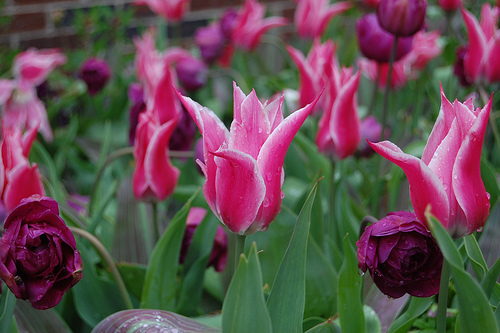

In [101]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/1.jpg'))

**Image 2**

In [102]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/2.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [103]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


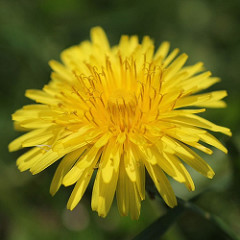

In [104]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/2.jpg'))

**Image 3**

In [105]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/3.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [106]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


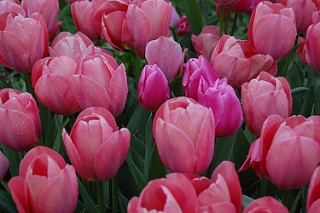

In [107]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/3.jpg'))

**Image 4**

In [108]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/4.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [109]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


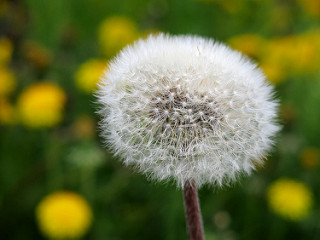

In [110]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/4.jpg'))

**Image 5**

In [111]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/5.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [112]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


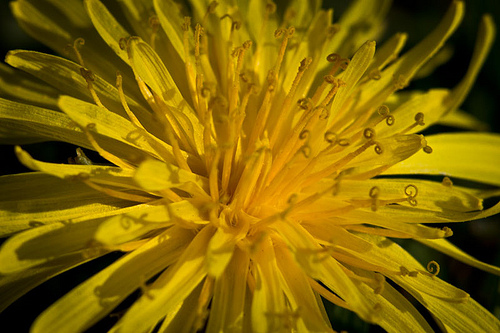

In [113]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/5.jpg'))

**Image 6**

In [114]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/6.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [115]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


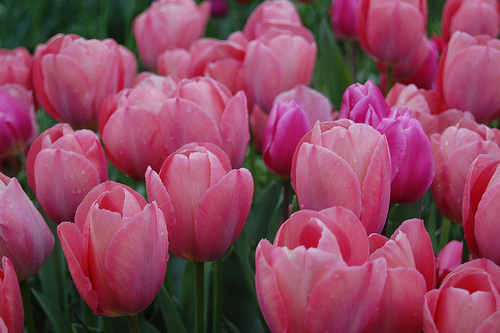

In [116]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/6.jpg'))

**Image 7**

In [117]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/7.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [118]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


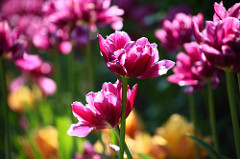

In [119]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/7.jpg'))

**Image 8**

In [120]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/8.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [121]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


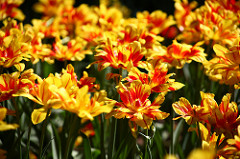

In [122]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/8.jpg'))

**Image 9**

In [123]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/9.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [124]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


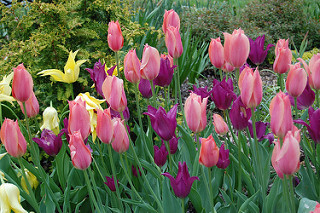

In [125]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/9.jpg'))

**Image 10**

In [126]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/10.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [127]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


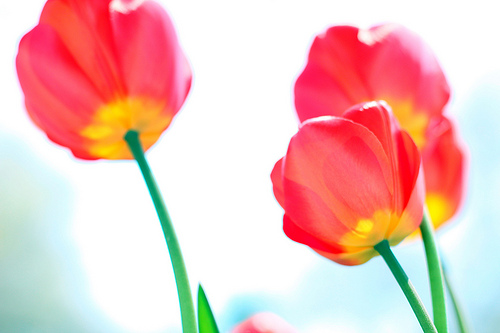

In [128]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/10.jpg'))

**Image 11**

In [129]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/11.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [130]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


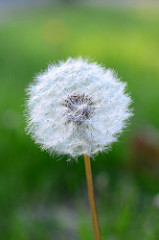

In [131]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/11.jpg'))

**Image 12**

In [132]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/12.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [133]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


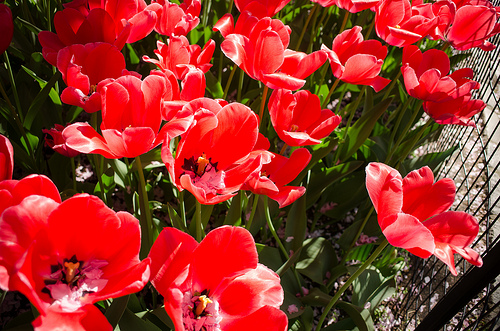

In [134]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/12.jpg'))

**Image 13**

In [135]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/13.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [136]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


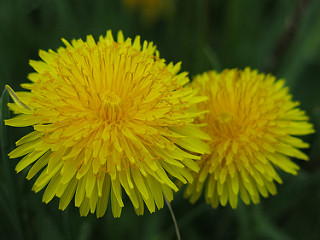

In [137]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/13.jpg'))

**Image 14**

In [138]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/14.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [139]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


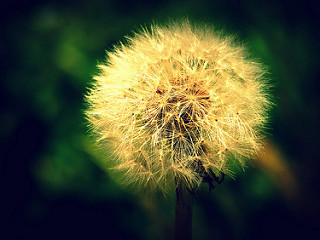

In [140]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/14.jpg'))

**Image 15**

In [141]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/15.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [142]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


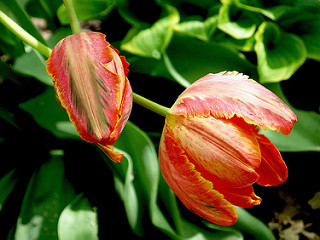

In [143]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/15.jpg'))

**Image 16**

In [144]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/16.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [145]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


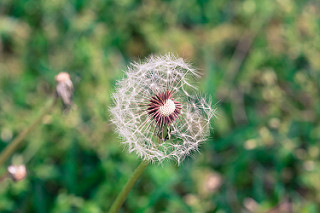

In [146]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/16.jpg'))

**Image 17**

In [147]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/17.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [148]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Tulip


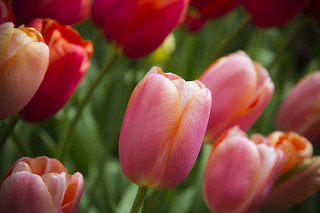

In [149]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/17.jpg'))

**Image 18**

In [150]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/18.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [151]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


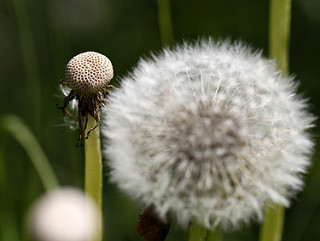

In [152]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/18.jpg'))

**Image 19**

In [153]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/19.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [154]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


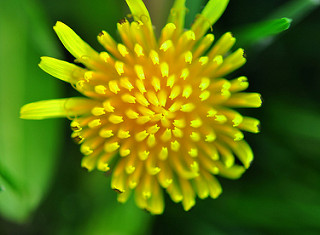

In [155]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/19.jpg'))

**Image 20**

In [156]:
test_image = image.load_img('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/20.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

In [157]:
if (result[0][0] == 1):
  prediction = 'Tulip'

else:
  prediction = 'Dandelion'

print(prediction)

Dandelion


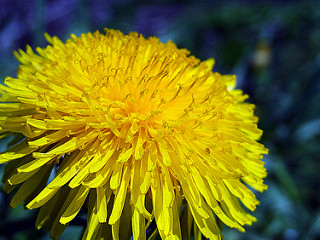

In [158]:
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/DL/Assign3/FlowerData/validate_set/20.jpg'))

**THANK YOU**